# Data Preprocessing

In [1]:
import cv2,os
#creating dict of category of data
data_path='D:/Minor Project Dataset'
categories=os.listdir(data_path)
categories #['without_mask', 'with_mask']
labels=[i for i in range(len(categories))]
labels #[0,1]
label_dict=dict(zip(categories,labels))
label_dict

{'without_mask': 0, 'with_mask': 1}

In [2]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)#it will join folder path in data path
    #print(folder_path)#1.D:/Minor Project Dataset\without_mask 2.D:/Minor Project Dataset\with_mask
    img_names=os.listdir(folder_path)#it will returns all img name in folder
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)#get the path of image
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#converting the image into gray scale
            #converting the gray scale into 100X100 since we need to common size for all the images
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label into the list(dataset)
            
        except Exception as e:
            print('Exception: ',e)

In [9]:
import numpy as np
data=np.array(data)/255.0#converting matrix values between 0 to 1
data=np.reshape(data,(data.shape[0],img_size,img_size,1))#reshaping array for CNN (layer as NUM of Img,H,W,Channel)



In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#new_target=to_Categorical(target)

In [15]:
new_target=tf.keras.utils.to_categorical(target, num_classes=None, dtype='float32')
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [31]:
np.save('data',data)
np.save('target',new_target)

# Covolutional Neuaral Network

In [1]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Dropout, Flatten

In [8]:
model=Sequential()
#first CNN Layer
model.add(Conv2D(200,(3,3),input_shape=(100,100,1),activation='relu'))
model.add(MaxPooling2D(2))

#Second CNN Layer
model.add(Conv2D(100,(3,3),activation='relu'))
model.add(MaxPooling2D(2))

#flattening
model.add(Flatten())
model.add(Dropout(0.5))

#Full Connection
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 52900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('Model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 276s 278ms/sample - loss: 0.7875 - acc: 0.5182 - val_loss: 0.6901 - val_acc: 0.4637
Epoch 2/20
990/990 [==============================] - 256s 259ms/sample - loss: 0.6643 - acc: 0.5899 - val_loss: 0.6170 - val_acc: 0.7218
Epoch 3/20
990/990 [==============================] - 244s 246ms/sample - loss: 0.5616 - acc: 0.7212 - val_loss: 0.4597 - val_acc: 0.8065
Epoch 4/20
990/990 [==============================] - 242s 244ms/sample - loss: 0.4641 - acc: 0.8020 - val_loss: 0.4192 - val_acc: 0.8710
Epoch 5/20
990/990 [==============================] - 248s 250ms/sample - loss: 0.3355 - acc: 0.8747 - val_loss: 0.2481 - val_acc: 0.9234
Epoch 6/20
990/990 [==============================] - 244s 247ms/sample - loss: 0.2416 - acc: 0.9081 - val_loss: 0.2048 - val_acc: 0.9435
Epoch 7/20
990/990 [==============================] - 247s 249ms/sample - loss: 0.1934 - acc: 0.9303 - val_loss: 0.1982 - val_

In [3]:
from tensorflow import keras
import cv2 
import numpy as np

C:\Users\Abhi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [5]:
model=keras.models.load_model("Model-013.model")
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(0)
labels_dict={0:'Without Mask',1:'Mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
while(True):
    
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        print(result)
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()


[[0.99474156 0.0052584 ]]
[[0.9951999  0.00480002]]
[[0.9953831  0.00461687]]
[[0.9955723  0.00442762]]
[[0.99560696 0.004393  ]]
[[0.9948085 0.0051915]]
[[0.9957917 0.0042083]]
[[0.995856   0.00414403]]
[[0.99556315 0.00443692]]
[[0.9953851  0.00461491]]
[[0.9954515  0.00454846]]
[[0.9954829  0.00451704]]
[[0.00439949 0.99560046]]
[[0.9958924  0.00410761]]
[[0.970519   0.02948103]]
[[0.99318236 0.00681758]]
[[0.99334055 0.00665943]]
[[0.99493754 0.00506245]]
[[0.99289787 0.00710214]]
[[0.9939666  0.00603341]]
[[0.9931773 0.0068227]]
[[0.99339795 0.00660203]]
[[0.99352735 0.00647264]]
[[0.99371415 0.00628586]]
[[0.9936566  0.00634336]]
[[0.9940539 0.0059461]]
[[0.9938823 0.0061177]]
[[0.99418455 0.00581545]]
[[0.99336183 0.00663821]]
[[0.9943573  0.00564271]]
[[0.99423885 0.00576115]]
[[0.9940467  0.00595328]]
[[0.99399054 0.00600945]]
[[0.9942889  0.00571109]]
[[0.9947188  0.00528113]]
[[0.9933095 0.0066905]]
[[0.99328387 0.00671609]]
[[0.99390644 0.00609359]]
[[0.99362636 0.00637364]

In [45]:
model=keras.models.load_model("Model-012.model")


In [46]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

0.99994695 5.3055443e-05


"if(result[0][0]==0):\n    title='Cat'\nelse:\n    title='Dog'\nplt.title(title)\nplt.show()"

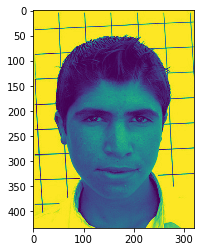

In [43]:
image_path=r"D:\Minor Project Dataset\without_mask\2.jpg"
#reshaped=np.reshape(normalized,(1,100,100,1))
#result=model.predict(reshaped)
img=cv2.imread(image_path,1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
print(result[0][0],result[0][1])        
    
#img = image.load_img(image_path, target_size=(100, 100,1),color_mode="grayscale")
plt.imshow(gray)
#img = np.expand_dims(resized_img, axis=0)
#print(reshaped.shape)
#result=model.predict_classes(img)
'''if(result[0][0]==0):
    title='Cat'
else:
    title='Dog'
plt.title(title)
plt.show()'''

In [ ]:
    #ret,img=source.read()
    img=cv2.imread(image_path,1)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        print(result)
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        


In [ ]:
img=cv2.imread('D:/Downloads HP/IMG-20200219-WA0044.jpg',0)